# Физический практикум

## Кипение чайника

**Цель работы**:
 * Понаблюдать за изменением физических величин в ходе кипения
 * Автоматически определить время закипания чайника
 * Определить теплоёмкость воды
 * Определить мощность чайника
 
![](https://cdn.shopify.com/s/files/1/0122/9674/9115/products/Smart-kettle-REDMOND-SkyKettle-G200S_1024x1024.jpg?v=1540112281)

# Практическая часть:
1. Возьмите устройство с sd картой
2. Налейте в чайник литр воды комнатной температуры
3. Расположите датчики в нужных местах:
    * Металлический датчик температуры поместите внутрь чайника
    * Датчик влажности - на крышку чайника
4. Включите устройство посредством подключения к источнику питания и включите чайник
5. Дождитесь полного закипния чайника и выключите его. Подождите еще немного и выключите устройство.
6. Вставьте sd карту в компьютер. Полученый файл с данными загрузите в azure notebooks и переименуйте на 'KETL.CSV'
7. Последовательно проделайте все шаги ниже

Схема подключения:
![](images/ketll.jpg)

Обозначим константы:

In [3]:
V=1 # Объем воды в чайнике в литрах
p=2200 #Мощность чайника (Введите свою)
rho=1 #Плотность воды
#c=4200 #Удельная теплоемкость воды

Прочтем полученные данные из файла и представим их в виде таблицы

In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv('KETL.CSV',skiprows=range (1,5))
df.head()

,frame,time,temp,a0,temp_pres,pressure,altitude,humidity,temp_hum
0,4,3026,24.19,1023,22.4,99466,156.11,26.7,22.7
1,5,3639,24.19,1023,22.4,99468,156.19,26.7,22.7
2,6,4250,24.19,1023,22.4,99466,156.11,26.7,22.7
3,7,4862,24.19,1023,22.4,99463,156.62,26.7,22.7
4,8,5478,24.19,1023,22.4,99470,156.11,28.0,22.7


Обрезаем первые несколько значений и для ускорения процесса прорежеваем данные

In [5]:
df=df.iloc[50:-120:5, :]
df['press']=(df['pressure']-df['pressure'].min())/50.0
df.head()

,frame,time,temp,a0,temp_pres,pressure,altitude,humidity,temp_hum,press
50,54,33715,24.19,1023,22.4,99473,155.69,28.0,22.7,1.70
55,59,36788,24.19,1023,22.4,99472,155.52,28.0,22.7,1.68
60,64,39855,24.19,1023,22.4,99467,155.60,28.0,22.7,1.58
65,69,42928,24.19,1023,22.4,99469,155.77,28.0,22.7,1.62
70,74,45991,24.19,1023,22.4,99472,155.52,28.0,22.8,1.68


Построим график интересующих нас величин
* `temp` - температура внутричайника
* `temp_hum` - температура снаружи чайника (показания с датчика влажности)
* `humidity` - влажность
* `temp_pres` - температура с датчика давления

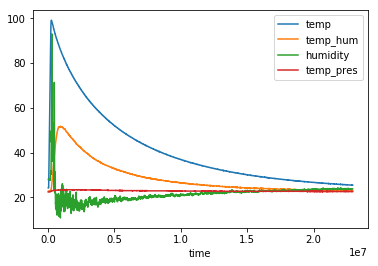

In [10]:
df.plot('time',['temp','temp_hum','humidity','temp_pres'])

Построим график кипения

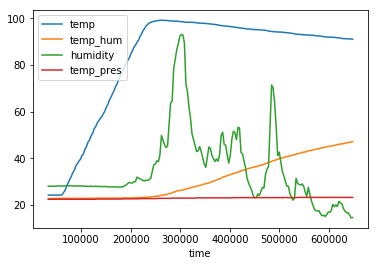

In [7]:
df1=df.iloc[:200, :]
df1.plot('time',['temp','temp_hum','humidity','temp_pres'])

Из данного графика можно сделать несколько выводов:
* Сразу после закипания резко повышается влажность из-за обилия выделяемого пара
* После закипания температура вокруг начинает расти, а температура чайника падать. Это показывает передачу тепла между чайником и окружающей средой
* Относительная влажность после эксперимента уменьшается в сравнении с начальным значением, хотя количество влаги в воздухе увеличилось. Это происходит из-за роста температуры. Подробнее [по ссылке](https://ru.wikipedia.org/wiki/%D0%9E%D1%82%D0%BD%D0%BE%D1%81%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%B2%D0%BB%D0%B0%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

Расчитаем время закипания чайника $t$, рассмотрев пики изменения температуы внутри

In [8]:
time_max=df.loc[df.idxmax()['temp']]['time']
df['delta'] = (df['temp']-df['temp'].shift()).fillna(0)
time_min=df[df['delta']>0.1]['time'].min()
time=(time_max-time_min)/1000.0
print(time_max,time_min)
print("Время закипания: {} сек".format(time))

261972.0 61419
Время закипания: 200.553 сек


Вычислим изменение температуры $\Delta T=T_{\max}-T_{\min}$ и теплоёмкость воды по формуле:
$$
c = \frac{Pt}{m\Delta T}
$$

Подробности можно прочитать [по ссылке](https://ru.wikipedia.org/wiki/%D0%A3%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BF%D0%BB%D0%BE%D1%91%D0%BC%D0%BA%D0%BE%D1%81%D1%82%D1%8C)

In [9]:
delta_temp=df['temp'].max()-df['temp'].min()
m=rho*V
cn=p*time/(m*delta_temp)
print('Изменение температуры воды',delta_temp,)
print('Полученная теплоемкость воды',cn)

Изменение температуры воды 75.0
Полученная теплоемкость воды 5882.888
